# Prediction of Heart Disease using Wide and Deep networks

In [1]:
import pandas as pd

#headers = ['Age','Sex','ChestPainType','RestingBP','Cholesterol','FastingBS','RestingECG','MaxHR','ExerciseAngina','Oldpeak','ST_Slope','HeartDisease']
df=pd.read_csv("heart.csv")
#df_test_orig = df_test_orig.iloc[1:]
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


In [2]:
import numpy as np
import copy
df_imputed = copy.deepcopy(df)
# let's just get rid of rows with any missing data
# and then reset the indices of the dataframe so it corresponds to row number
df_imputed.replace(to_replace=' ?',value=np.nan, inplace=True)
df_imputed.dropna(inplace=True)
df_imputed.reset_index()

df_imputed.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


The metadata about the dataset:

Number of attributes: 12

Feature information: A DataFrame with 918 rows and 12 variables:

1. Age: age of the patient - years
2. Sex: sex of the patient
    - M: male
    - F: female
3. ChestPainType: chest pain type 
    - TA: Typical Angina 
    - ATA: Atypical Angina 
    - NAP: Non-Anginal Pain 
    - ASY: Asymptomatic
4. RestingBP: resting blood pressure - mm Hg
5. Cholesterol: serum cholesterol - mm/dl
6. FastingBS: fasting blood sugar 
    - 1: if FastingBS > 120 mg/dl
    - 0: otherwise
7. RestingECG: resting electrocardiogram results 
    - The resting ECG is a simple, quick and painless test. The resting ECG can detect certain heart conditions           such as hypertrophy of heart, ischemia, myocardial infarction, sequelae of myocardial infarction, cardiac           arrhythmias, etc. The test takes about 5 minutes and no preparation is necessary.
    - Normal: Normal 
    - ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
    - LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. MaxHR: maximum heart rate achieved 
    - Maximum Heart Rate (or Max HR or MHR) is the amount of beats a heart makes in a minute under maximum stress.
    - Numeric value between 60 and 202
9. ExerciseAngina: exercise-induced angina 
    - Y: Yes
    - N: No
10. Oldpeak: oldpeak = ST 
    - Numeric value measured in depression
11. ST_Slope: the slope of the peak exercise ST segment 
    - Up: upsloping
    - Flat: flat
    - Down: downsloping
12. HeartDisease: output class 
    - 1: heart disease
    - 0: Normal
    
[reference: https://www.kaggle.com/fedesoriano/heart-failure-prediction ]

Performing scaling of numeric values Age, RestingBP, Cholesterol, MaxHR by zero mean and unit standard deviation.

In [3]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# ========================================================
# define objects that can encode each variable as integer    
encoders = dict() # save each encoder in dictionary
categorical_headers = ['Sex','ChestPainType','RestingECG',
                       'ExerciseAngina','ST_Slope']

# train all encoders (special case the target 'income')
for col in categorical_headers:
    df_imputed[col] = df_imputed[col].str.strip()
    # integer encode strings that are features
    encoders[col] = LabelEncoder() # save the encoder
    df_imputed[col+'_int'] = encoders[col].fit_transform(df_imputed[col])

# ========================================================
# scale the numeric, continuous variables
numeric_headers = ["Age", "RestingBP", "Cholesterol","MaxHR"]

for col in numeric_headers:
    df_imputed[col] = df_imputed[col].astype(float)
    
    ss = StandardScaler()
    df_imputed[col] = ss.fit_transform(df_imputed[col].values.reshape(-1, 1))
include_header =["FastingBS","Oldpeak"]
df_imputed.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_int,ChestPainType_int,RestingECG_int,ExerciseAngina_int,ST_Slope_int
0,-1.433140,M,ATA,0.410909,0.825070,0,Normal,1.382928,N,0.0,Up,0,1,1,1,0,2
1,-0.478484,F,NAP,1.491752,-0.171961,0,Normal,0.754157,N,1.0,Flat,1,0,2,1,0,1
2,-1.751359,M,ATA,-0.129513,0.770188,0,ST,-1.525138,N,0.0,Up,0,1,1,2,0,2
3,-0.584556,F,ASY,0.302825,0.139040,0,Normal,-1.132156,Y,1.5,Flat,1,0,0,1,1,1
4,0.051881,M,NAP,0.951331,-0.034755,0,Normal,-0.581981,N,0.0,Up,0,1,2,1,0,2


In [4]:
# let's start as simply as possible, without any feature preprocessing
categorical_headers_ints = [x+'_int' for x in categorical_headers]

# we will forego one-hot encoding right now and instead just use all inputs as-is
#   this is just to get an example running in Keras (its not a good idea)
feature_columns = categorical_headers_ints+numeric_headers+include_header

print(feature_columns)

['Sex_int', 'ChestPainType_int', 'RestingECG_int', 'ExerciseAngina_int', 'ST_Slope_int', 'Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'FastingBS', 'Oldpeak']


In [5]:
from sklearn import metrics as mt
from tensorflow import keras

keras.__version__

'2.2.4-tf'

In [6]:
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.models import Model

In [7]:
import numpy as np
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
X = df_imputed[feature_columns].to_numpy()
# we want to predict the X and y data as follows:
y = df_imputed['HeartDisease'].values # get the labels we want
 # get rid of the class label
    #norm_features = ['Age','Fare' ]
    #df_imputed[norm_features] = (df_imputed[norm_features]-df_imputed[norm_features].mean()) / df_imputed[norm_features].std()
     # use everything else to predict!

    ## X and y are now numpy matrices, by calling 'values' on the pandas data frames we
    #    have converted them into simple matrices to use with scikit learn
    
    
# to use the cross validation object in scikit learn, we need to grab an instance
#    of the object and set it up. This object will be able to split our data into 
#    training and testing splits
num_cv_iterations = 10
num_instances = len(y)
cv_object = StratifiedKFold(
                         n_splits=num_cv_iterations)
                         
print(cv_object)

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)


In [8]:
# run logistic regression and vary some parameters
from sklearn import metrics as mt

# first we create a reusable logisitic regression object
#   here we can setup the object with different learning parameters and constants
#lr_clf = HessianBinaryLogisticRegression(eta=0.1,iterations=10) # get object

# now we can use the cv_object that we setup before to iterate through the 
#    different training and testing sets. Each time we will reuse the logisitic regression 
#    object, but it gets trained on different data each time we use it.

iter_num=0
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object.split(X,y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]

In [9]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0])

In [10]:
y_train

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [11]:
import numpy as np
# get some of the specifics of the dataset


n_samples, n_features = X.shape
n_classes = len(np.unique(y))

print("n_samples: {}".format(n_samples))
print("n_features: {}".format(n_features))
print("n_classes: {}".format(n_classes))

n_samples: 918
n_features: 11
n_classes: 2


Number of instances in each class:[410 508]


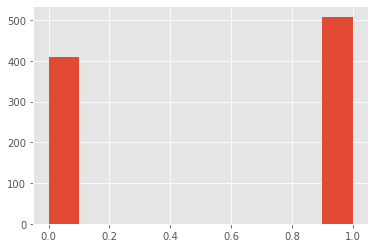

In [12]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')


#=== Fill in code below========
print('Number of instances in each class:'+str(np.bincount(y)))
# you might be interested in the functions:
#     np.bincount
#     plt.hist
plt.hist(y)
plt.show()

(0.7743137254901961, 0.9607843137254902)

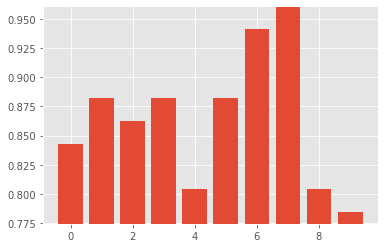

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, ShuffleSplit
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit

from sklearn.metrics import make_scorer, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.linear_model import LogisticRegression
# these imports above might help you

#=====Write your code below here=================
# select model
clf = LogisticRegression()
clf.fit(X,y)
#select cross validation
cv = StratifiedShuffleSplit(n_splits=10) #made kfold stratified
# select evaluation criteria
my_scorer = make_scorer(recall_score)
# run model training and cross validation
per_fold_eval_criteria = cross_val_score(estimator=clf,
                                    X=X,
                                    y=y,
                                    cv=cv,
                                    scoring=my_scorer
                                   )

plt.bar(range(len(per_fold_eval_criteria)),per_fold_eval_criteria)
plt.ylim([min(per_fold_eval_criteria)-0.01,max(per_fold_eval_criteria)])
#print(per_fold_eval_criteria.mean()*100)

We have 508 values as 'HeartDisease' i.e. 1. From, above bar chart, we can see that few of the bars are 86% i.e. 1 denoting HeartDisease. So, some of folds have perfect recall. lowest here is 0.80, its 80% recall. 

We do not have severe class imbalance in our data set. We need to stratify accross all the folds that we use and make sure classes are stratified in each fold. In order to properly seperate training and testing sets a stratified KFold should be used. Stratified KFold will ensure that each fold is representative of the overall data set. This cross-validation object is a variation of KFold that returns stratified folds. The folds are made by preserving the percentage of samples for each class.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html

In [14]:
# Now let's define the architecture for a multi-layer network

# First, lets setup the input size
num_features = X_train.shape[1]
input_tensor = Input(shape=(num_features,))

# a layer instance is callable on a tensor, and returns a tensor
x = Dense(units=10, activation='relu')(input_tensor)
x = Dense(units=5, activation='tanh')(x)
predictions = Dense(1, activation='sigmoid')(x)

# This creates a model that includes
# the Input layer and three Dense layers
model = Model(inputs=input_tensor, outputs=predictions)

2021-11-14 20:45:52.542800: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-14 20:45:52.543800: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


For this data set, we care more about the true positives and false negatives. It is medical dataset and prediction of many false negative values will be considered bad model. Recall should be used instead of accuracy due to the importance of false negatives for this data set.

In [15]:
from tensorflow.keras.metrics import Recall
model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=[Recall()])

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 11)]              0         
_________________________________________________________________
dense (Dense)                (None, 10)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


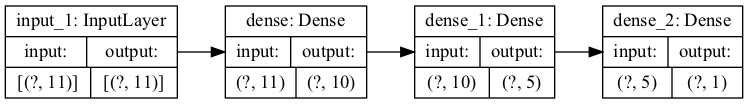

In [16]:
from tensorflow.keras.utils import plot_model

# you will need to install pydot properly on your machine to get this running
plot_model(
    model, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR'
)

In [17]:
%%time

model.fit(X_train, y_train, epochs=10, batch_size=50, verbose=1)

# now lets see how well the model performed
from sklearn import metrics as mt
yhat_proba = model.predict(X_test)
yhat = np.round(yhat_proba)
print(mt.confusion_matrix(y_test,yhat))
print(mt.classification_report(y_test,yhat))

Train on 827 samples
Epoch 1/10
827/827 [==============================] - 1s 735us/sample - loss: 0.2816 - recall: 0.2336
Epoch 2/10
827/827 [==============================] - 0s 27us/sample - loss: 0.2720 - recall: 0.3144
Epoch 3/10
827/827 [==============================] - 0s 26us/sample - loss: 0.2635 - recall: 0.4039
Epoch 4/10
827/827 [==============================] - 0s 28us/sample - loss: 0.2555 - recall: 0.5175
Epoch 5/10
827/827 [==============================] - 0s 24us/sample - loss: 0.2482 - recall: 0.5983
Epoch 6/10
827/827 [==============================] - 0s 23us/sample - loss: 0.2413 - recall: 0.6419
Epoch 7/10
827/827 [==============================] - 0s 30us/sample - loss: 0.2349 - recall: 0.6725
Epoch 8/10
827/827 [==============================] - 0s 24us/sample - loss: 0.2287 - recall: 0.7314
Epoch 9/10
827/827 [==============================] - 0s 24us/sample - loss: 0.2227 - recall: 0.7926
Epoch 10/10
827/827 [==============================] - 0s 25us/sample

- Embedding Categorical Data¶
- In order to add one-hot encoding, we need to separate the categorical features that are currently saved as integers and place them into Embedding layers. An embedding layer deals with integers as if they were one-hot encoded.
[Professor Eric Larson]

In [18]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import concatenate
import tensorflow as tf

# start by getting only the categorical variables
# these matrices are all integers
#X_train = df_train[categorical_headers_ints].to_numpy() 
#X_test = df_test[categorical_headers_ints].to_numpy() 

embed_branches = []
all_branch_outputs = [] # this is where we will keep track of output of each branch

# feed in the entire matrix of categircal variables
input_branch = Input(shape=(X_train.shape[1],), 
                     dtype='int64', 
                     name='categorical')

# for each categorical variable
for idx,col in enumerate(categorical_headers_ints):
    
    # what the maximum integer value for this variable?
    # which is the same as the number of categories
    N = df_imputed[col].max()+1 
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_branch, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs in list to concatenate later
    all_branch_outputs.append(x)
    
# now concatenate the outputs and add a fully connected layer
final_branch = concatenate(all_branch_outputs, name='concat_1')
final_branch = Dense(units=1,
                     activation='sigmoid', 
                     name='combined')(final_branch)

model = Model(inputs=input_branch, outputs=final_branch)

model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=[Recall()])

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
categorical (InputLayer)        [(None, 11)]         0                                            
__________________________________________________________________________________________________
tf_op_layer_GatherV2 (TensorFlo [(None,)]            0           categorical[0][0]                
__________________________________________________________________________________________________
tf_op_layer_GatherV2_1 (TensorF [(None,)]            0           categorical[0][0]                
__________________________________________________________________________________________________
tf_op_layer_GatherV2_2 (TensorF [(None,)]            0           categorical[0][0]                
____________________________________________________________________________________________

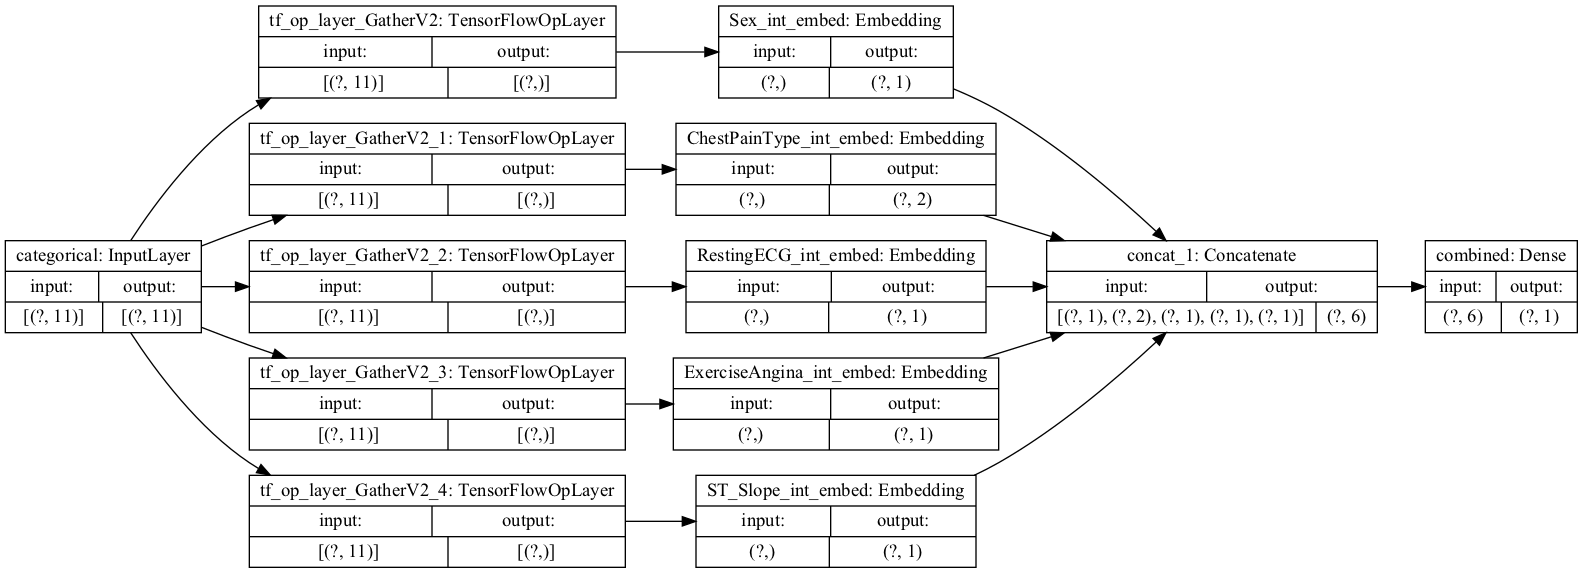

In [19]:
plot_model(
    model, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

In [20]:
%%time

model.fit(X_train, y_train, epochs=10, batch_size=50, verbose=1)

from sklearn import metrics as mt
yhat_proba = model.predict(X_test)
yhat = np.round(yhat_proba)
print(mt.confusion_matrix(y_test,yhat))
print(mt.classification_report(y_test,yhat))

Train on 827 samples
Epoch 1/10
827/827 [==============================] - 1s 696us/sample - loss: 0.2492 - recall_1: 0.6441
Epoch 2/10
827/827 [==============================] - 0s 35us/sample - loss: 0.2476 - recall_1: 0.8144
Epoch 3/10
827/827 [==============================] - 0s 34us/sample - loss: 0.2459 - recall_1: 0.8362
Epoch 4/10
827/827 [==============================] - 0s 33us/sample - loss: 0.2443 - recall_1: 0.8712
Epoch 5/10
827/827 [==============================] - 0s 33us/sample - loss: 0.2428 - recall_1: 0.9301
Epoch 6/10
827/827 [==============================] - 0s 35us/sample - loss: 0.2413 - recall_1: 0.9301
Epoch 7/10
827/827 [==============================] - 0s 33us/sample - loss: 0.2398 - recall_1: 0.9301
Epoch 8/10
827/827 [==============================] - 0s 32us/sample - loss: 0.2384 - recall_1: 0.9301
Epoch 9/10
827/827 [==============================] - 0s 34us/sample - loss: 0.2371 - recall_1: 0.9301
Epoch 10/10
827/827 [==============================

ValueError: Inconsistent values for attr 'Tparams' DT_FLOAT vs. DT_INT64 while building NodeDef 'model_1/tf_op_layer_GatherV2_4/GatherV2_4' using Op<name=GatherV2; signature=params:Tparams, indices:Tindices, axis:Taxis -> output:Tparams; attr=batch_dims:int,default=0; attr=Tparams:type; attr=Tindices:type,allowed=[DT_INT32, DT_INT64]; attr=Taxis:type,allowed=[DT_INT32, DT_INT64]>

In [21]:
cat_X = df_imputed[categorical_headers_ints].to_numpy()
# we want to predict the X and y data as follows:
cat_y = df_imputed['HeartDisease'].values # get the labels we want
iter_num=0
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object.split(cat_X,cat_y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train_cat = cat_X[train_indices]
    y_train_cat = cat_y[train_indices]
    
    X_test_cat = cat_X[test_indices]
    y_test_cat = cat_y[test_indices]
    
num_X = df_imputed[categorical_headers_ints].to_numpy()
# we want to predict the X and y data as follows:
num_y = df_imputed['HeartDisease'].values # get the labels we want
iter_num=0
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object.split(num_X,num_y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train_num = num_X[train_indices]
    y_train_num = num_y[train_indices]
    
    X_test_num = num_X[test_indices]
    y_test_num = num_y[test_indices]

In [22]:
# save categorical features
#X_train_cat = df_train[categorical_headers_ints].to_numpy() 
#X_test_cat = df_test[categorical_headers_ints].to_numpy() 

# and save off the numeric features
#X_train_num =  df_[numeric_headers].to_numpy()
#X_test_num = df_test[numeric_headers].to_numpy()

all_branch_outputs = [] # this is where we will keep track of output of each branch

input_cat = Input(shape=(X_train_cat.shape[1],), dtype='int64', name='categorical')
for idx,col in enumerate(categorical_headers_ints):
    
    # track what the maximum integer value will be for this variable
    # which is the same as the number of categories
    N = df_imputed[col].max()+1
    
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_cat, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    all_branch_outputs.append(x)
    
# HERE IS THE ADDING OF AN INPUT USING NUMERIC DATA
# create dense input branch for numeric
inputs_num = Input(shape=(X_train_num.shape[1],), name='numeric')
x_dense = Dense(units=22, activation='relu', name='num_1')(inputs_num)
    
all_branch_outputs.append(x_dense)

# now concatenate the outputs and add a fully connected layer
final_branch = concatenate(all_branch_outputs, name='concat_1')
final_branch = Dense(units=10, activation='relu', name='combined_1')(final_branch)
final_branch = Dense(units=1, activation='sigmoid', name='combined_2')(final_branch)

model = Model(inputs=[input_cat,inputs_num], outputs=final_branch)

model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=[Recall()])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
categorical (InputLayer)        [(None, 5)]          0                                            
__________________________________________________________________________________________________
tf_op_layer_GatherV2_5 (TensorF [(None,)]            0           categorical[0][0]                
__________________________________________________________________________________________________
tf_op_layer_GatherV2_6 (TensorF [(None,)]            0           categorical[0][0]                
__________________________________________________________________________________________________
tf_op_layer_GatherV2_7 (TensorF [(None,)]            0           categorical[0][0]                
____________________________________________________________________________________________

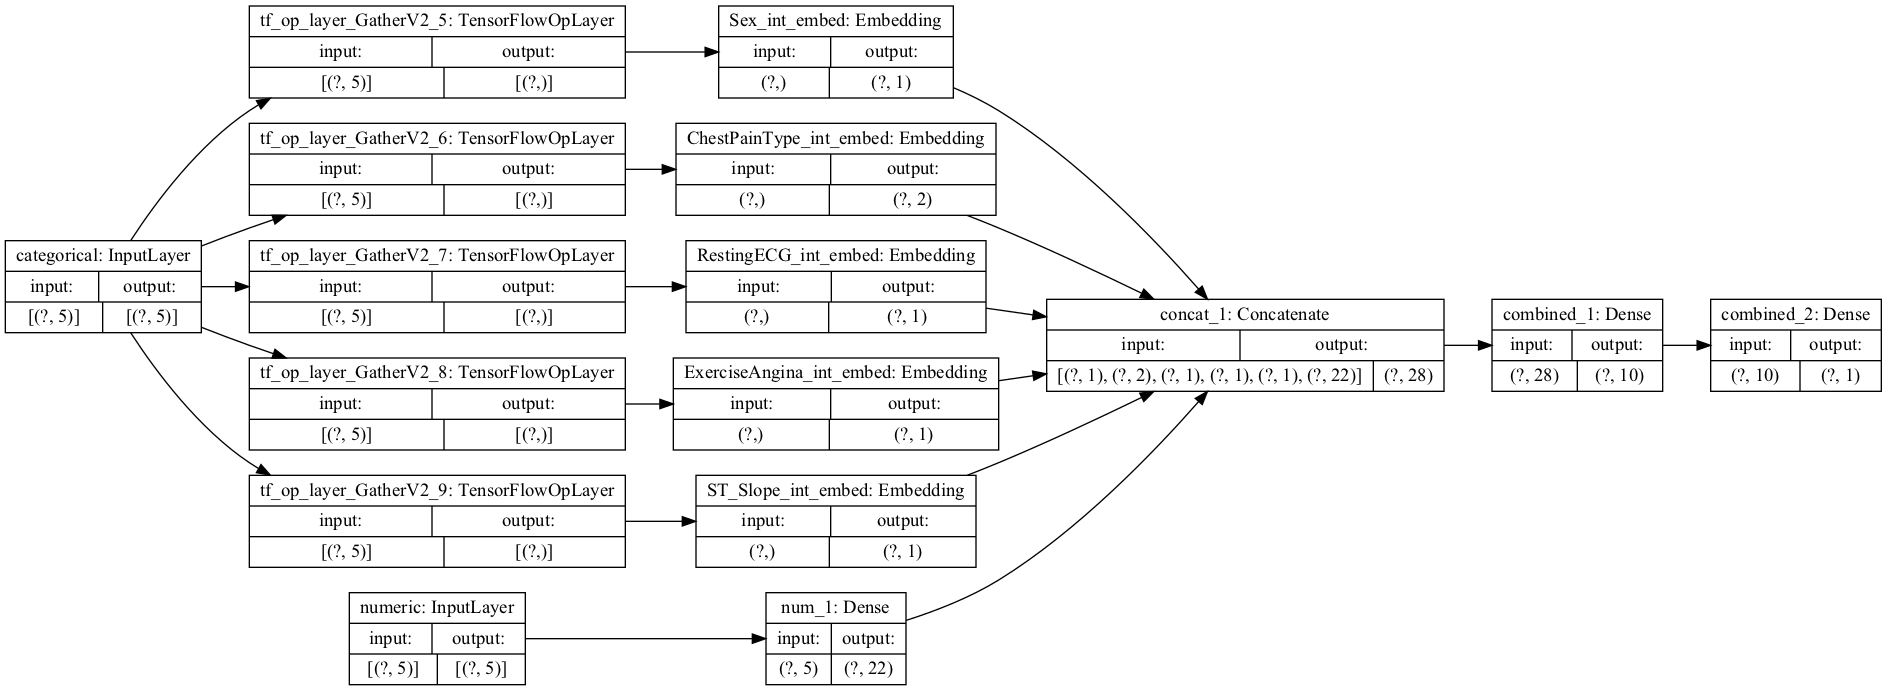

In [23]:
plot_model(
    model, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)

In [24]:
%%time

model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['accuracy'])

model.fit([ X_train_cat, X_train_num ], # inputs for each branch are a list
          y_train, 
          epochs=10, 
          batch_size=50, 
          verbose=1)

yhat = model.predict([X_test_cat,
                      X_test_num]) # each branch has an input

yhat = np.round(yhat)
print(mt.confusion_matrix(y_test,yhat))
print(mt.classification_report(y_test,yhat))

Train on 827 samples
Epoch 1/10
827/827 [==============================] - 1s 665us/sample - loss: 0.3162 - accuracy: 0.4450
Epoch 2/10
827/827 [==============================] - 0s 36us/sample - loss: 0.3029 - accuracy: 0.4450
Epoch 3/10
827/827 [==============================] - 0s 37us/sample - loss: 0.2912 - accuracy: 0.4450
Epoch 4/10
827/827 [==============================] - 0s 39us/sample - loss: 0.2812 - accuracy: 0.4462
Epoch 5/10
827/827 [==============================] - 0s 37us/sample - loss: 0.2728 - accuracy: 0.4075
Epoch 6/10
827/827 [==============================] - 0s 36us/sample - loss: 0.2663 - accuracy: 0.3724
Epoch 7/10
827/827 [==============================] - 0s 33us/sample - loss: 0.2614 - accuracy: 0.3434
Epoch 8/10
827/827 [==============================] - 0s 35us/sample - loss: 0.2572 - accuracy: 0.3313
Epoch 9/10
827/827 [==============================] - 0s 36us/sample - loss: 0.2535 - accuracy: 0.4087
Epoch 10/10
827/827 [==============================

In [25]:
# sandbox for looking at different categorical variables
for col in categorical_headers:
    vals = df_imputed[col].unique()
    print(col,'has', len(vals), 'unique values:')
    print(vals)

Sex has 2 unique values:
['M' 'F']
ChestPainType has 4 unique values:
['ATA' 'NAP' 'ASY' 'TA']
RestingECG has 3 unique values:
['Normal' 'ST' 'LVH']
ExerciseAngina has 2 unique values:
['N' 'Y']
ST_Slope has 3 unique values:
['Up' 'Flat' 'Down']


Group of feature that should be combined are: ChestpainType, RestingECG, ST_Slope.
They are test that are performed to conclude :
* resting ECG can detect certain heart conditions
* The ST segment shift relative to exercise-induced increments in heart rate, the ST/heart rate slope (ST/HR slope), has been proposed as a more accurate ECG criterion for diagnosing significant coronary artery disease (CAD).
* chest pain that resembles heart pain (also called angina) in patients who do not have heart disease. 
- These are necessary in categorizing possibilities of heart disease. 



In [26]:
# possible crossing options:
#   'workclass','education','marital_status',
#   'occupation','relationship','race',
#   'sex','country'

cross_columns = [['ChestPainType','RestingECG','ST_Slope'],
                 #['sex', 'marital_status'],
                 #['workclass','occupation'],
                 #['occupation','race','education'],
                 ['Sex','ExerciseAngina']
                ]

# cross each set of columns in the list above
cross_col_df_names = []
for cols_list in cross_columns:
    # encode as ints for the embedding
    enc = LabelEncoder()
    
    # 1. create crossed labels by join operation
    X_crossed_train = df_imputed[cols_list].apply(lambda x: '_'.join(x), axis=1)
   # X_crossed_test = df_test[cols_list].apply(lambda x: '_'.join(x), axis=1)
    
    # get a nice name for this new crossed column
    cross_col_name = '_'.join(cols_list)
    
    # 2. encode as integers
    enc.fit(np.hstack((X_crossed_train.to_numpy())))
    
    # 3. Save into dataframe with new name
    df_imputed[cross_col_name] = enc.transform(X_crossed_train)
    #df_test[cross_col_name] = enc.transform(X_crossed_test)
    
    # keep track of the new names of the crossed columns
    cross_col_df_names.append(cross_col_name) 
    
cross_col_df_names

['ChestPainType_RestingECG_ST_Slope', 'Sex_ExerciseAngina']

In [27]:
cross_X = df_imputed[cross_col_df_names].to_numpy()
# we want to predict the X and y data as follows:
cross_y = df_imputed['HeartDisease'].values # get the labels we want
iter_num=0
# the indices are the rows used for training and testing in each iteration
for train_indices, test_indices in cv_object.split(cross_X,cross_y): 
    # I will create new variables here so that it is more obvious what 
    # the code is doing (you can compact this syntax and avoid duplicating memory,
    # but it makes this code less readable)
    X_train_crossed = cross_X[train_indices]
    y_train_crossed = cross_y[train_indices]
    
    X_test_crossed = cross_X[test_indices]
    y_test_crossed = cross_y[test_indices]

In [28]:
# get crossed columns
X_train_crossed
X_test_crossed

crossed_outputs = [] # this is where we will keep track of output of each branch

input_crossed = Input(shape=(X_train_crossed.shape[1],), dtype='int64', name='categorical')
for idx,col in enumerate(cross_col_df_names):
    
    # track what the maximum integer value will be for this variable
    # which is the same as the number of categories
    N = df_imputed[col].max()+1
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_crossed, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    crossed_outputs.append(x)
    

# now concatenate the outputs and add a fully connected layer
wide_branch = concatenate(crossed_outputs, name='concat_1')
wide_branch = Dense(units=1,activation='sigmoid', name='combined')(wide_branch)

model = Model(inputs=input_crossed, outputs=wide_branch)

model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=[Recall()])

model.fit(X_train_crossed,
        y_train, epochs=10, batch_size=32, verbose=1)

Train on 827 samples
Epoch 1/10
827/827 [==============================] - 0s 476us/sample - loss: 0.2495 - recall_3: 0.6550
Epoch 2/10
827/827 [==============================] - 0s 39us/sample - loss: 0.2465 - recall_3: 0.7773
Epoch 3/10
827/827 [==============================] - 0s 36us/sample - loss: 0.2436 - recall_3: 0.8668
Epoch 4/10
827/827 [==============================] - 0s 37us/sample - loss: 0.2408 - recall_3: 0.8974
Epoch 5/10
827/827 [==============================] - 0s 37us/sample - loss: 0.2381 - recall_3: 0.9236
Epoch 6/10
827/827 [==============================] - 0s 39us/sample - loss: 0.2354 - recall_3: 0.9236
Epoch 7/10
827/827 [==============================] - 0s 36us/sample - loss: 0.2329 - recall_3: 0.9236
Epoch 8/10
827/827 [==============================] - 0s 36us/sample - loss: 0.2304 - recall_3: 0.9236
Epoch 9/10
827/827 [==============================] - 0s 37us/sample - loss: 0.2280 - recall_3: 0.9170
Epoch 10/10
827/827 [==============================

In [29]:
# bonus: we can keep training, picking up where we left of (no reinitialization)
model.fit(X_train_crossed,
        y_train, epochs=10, batch_size=32, verbose=1)

Train on 827 samples
Epoch 1/10
827/827 [==============================] - 0s 64us/sample - loss: 0.2234 - recall_3: 0.8930
Epoch 2/10
827/827 [==============================] - 0s 38us/sample - loss: 0.2212 - recall_3: 0.8865
Epoch 3/10
827/827 [==============================] - 0s 38us/sample - loss: 0.2190 - recall_3: 0.8886
Epoch 4/10
827/827 [==============================] - 0s 38us/sample - loss: 0.2170 - recall_3: 0.8865
Epoch 5/10
827/827 [==============================] - 0s 37us/sample - loss: 0.2149 - recall_3: 0.8821
Epoch 6/10
827/827 [==============================] - 0s 37us/sample - loss: 0.2129 - recall_3: 0.8777
Epoch 7/10
827/827 [==============================] - 0s 40us/sample - loss: 0.2109 - recall_3: 0.8690
Epoch 8/10
827/827 [==============================] - 0s 38us/sample - loss: 0.2090 - recall_3: 0.8668
Epoch 9/10
827/827 [==============================] - 0s 35us/sample - loss: 0.2072 - recall_3: 0.8624
Epoch 10/10
827/827 [==============================]

In [30]:
yhat = np.round(model.predict(X_test_crossed))
print(mt.confusion_matrix(y_test,yhat))
print(mt.classification_report(y_test,yhat))



[[32  9]
 [14 36]]
              precision    recall  f1-score   support

           0       0.70      0.78      0.74        41
           1       0.80      0.72      0.76        50

    accuracy                           0.75        91
   macro avg       0.75      0.75      0.75        91
weighted avg       0.75      0.75      0.75        91



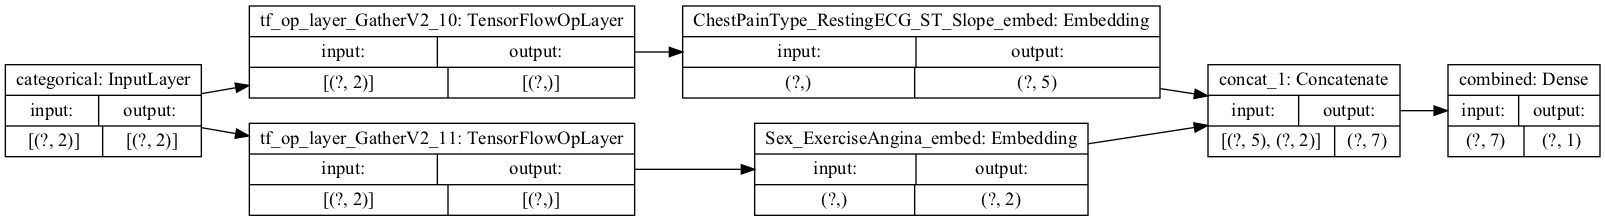

In [31]:
# you will need to install pydot properly on your machine to get this running
plot_model(
    model, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)



In [32]:
# get crossed columns
#X_train_crossed = df_train[cross_col_df_names].to_numpy()
#X_test_crossed = df_test[cross_col_df_names].to_numpy()

# save categorical features
#X_train_cat = df_train[categorical_headers_ints].to_numpy() 
#X_test_cat = df_test[categorical_headers_ints].to_numpy() 

# and save off the numeric features
#X_train_num =  df_train[numeric_headers].to_numpy()
#X_test_num = df_test[numeric_headers].to_numpy()


# we need to create separate lists for each branch
crossed_outputs = []

# CROSSED DATA INPUT
input_crossed = Input(shape=(X_train_crossed.shape[1],), dtype='int64', name='wide_inputs')
for idx,col in enumerate(cross_col_df_names):
    
    # track what the maximum integer value will be for this variable
    # which is the same as the number of categories
    N = df_imputed[col].max()+1
    
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_crossed, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    crossed_outputs.append(x)
    

# now concatenate the outputs and add a fully connected layer
wide_branch = concatenate(crossed_outputs, name='wide_concat')

# reset this input branch
all_deep_branch_outputs = []

# CATEGORICAL DATA INPUT
input_cat = Input(shape=(X_train_cat.shape[1],), dtype='int64', name='categorical_input')
for idx,col in enumerate(categorical_headers_ints):
    
    # track what the maximum integer value will be for this variable
    # which is the same as the number of categories
    N = df_imputed[col].max()+1
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_cat, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    all_deep_branch_outputs.append(x)
    
# NUMERIC DATA INPUT
# create dense input branch for numeric
input_num = Input(shape=(X_train_num.shape[1],), name='numeric')
x_dense = Dense(units=22, activation='relu',name='num_1')(input_num)
    
all_deep_branch_outputs.append(x_dense)


# merge the deep branches together
deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
deep_branch = Dense(units=50,activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=25,activation='relu', name='deep2')(deep_branch)
deep_branch = Dense(units=10,activation='relu', name='deep3')(deep_branch)
    
# merge the deep and wide branch
final_branch = concatenate([wide_branch, deep_branch],
                           name='concat_deep_wide')
final_branch = Dense(units=1,activation='sigmoid',
                     name='combined')(final_branch)

model = Model(inputs=[input_crossed,input_cat,input_num], 
              outputs=final_branch)

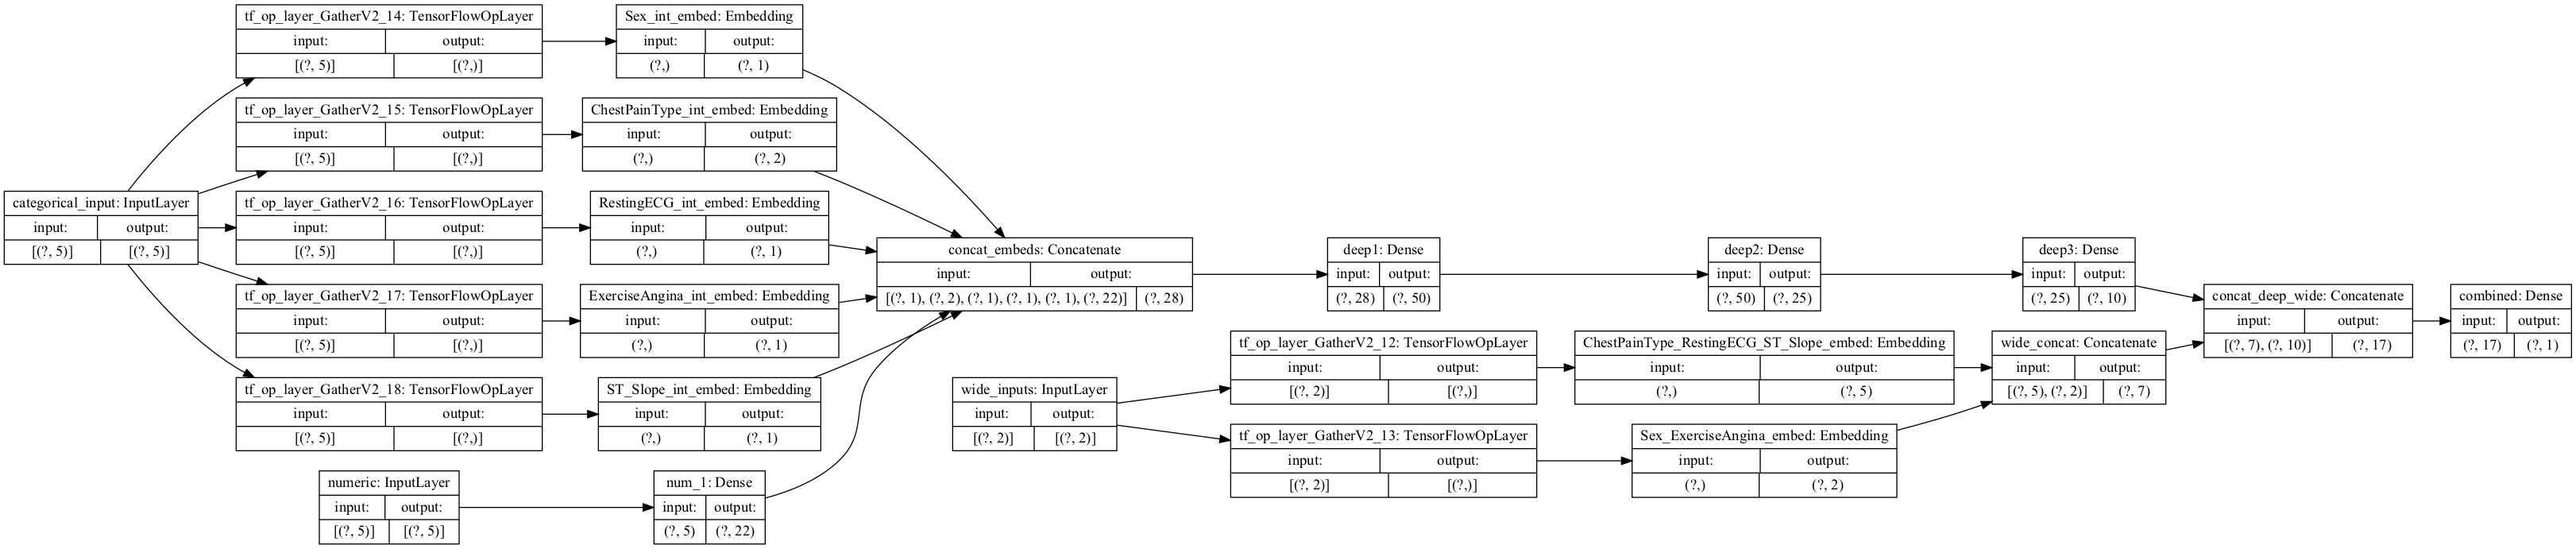

In [33]:
# you will need to install pydot properly on your machine to get this running
plot_model(
    model, to_file='model.png', show_shapes=True, show_layer_names=True,
    rankdir='LR', expand_nested=False, dpi=96
)
# model.summary()

In [34]:
%%time

model.compile(optimizer='adagrad',
              loss='mean_squared_error',
              metrics=['Recall'])

# lets also add the history variable to see how we are doing
# and lets add a validation set to keep track of our progress
history = model.fit([X_train_crossed,X_train_cat,X_train_num],
                    y_train, 
                    epochs=15, 
                    batch_size=32, 
                    verbose=1, 
                    validation_data = ([X_test_crossed,X_test_cat,X_test_num],y_test))

Train on 827 samples, validate on 91 samples
Epoch 1/15
827/827 [==============================] - 1s 2ms/sample - loss: 0.2341 - Recall: 0.4847 - val_loss: 0.2287 - val_Recall: 0.7800
Epoch 2/15
827/827 [==============================] - 0s 117us/sample - loss: 0.2213 - Recall: 0.7729 - val_loss: 0.2225 - val_Recall: 0.7400
Epoch 3/15
827/827 [==============================] - 0s 116us/sample - loss: 0.2138 - Recall: 0.8013 - val_loss: 0.2174 - val_Recall: 0.7400
Epoch 4/15
827/827 [==============================] - 0s 114us/sample - loss: 0.2075 - Recall: 0.8057 - val_loss: 0.2129 - val_Recall: 0.7400
Epoch 5/15
827/827 [==============================] - 0s 113us/sample - loss: 0.2020 - Recall: 0.8079 - val_loss: 0.2088 - val_Recall: 0.7400
Epoch 6/15
827/827 [==============================] - 0s 111us/sample - loss: 0.1970 - Recall: 0.8057 - val_loss: 0.2050 - val_Recall: 0.7400
Epoch 7/15
827/827 [==============================] - 0s 113us/sample - loss: 0.1924 - Recall: 0.8100 - v

In [35]:

yhat = np.round(model.predict([X_test_crossed,X_test_cat,X_test_num]))
print(mt.confusion_matrix(y_test,yhat))
print(mt.classification_report(y_test,yhat))

[[36  5]
 [13 37]]
              precision    recall  f1-score   support

           0       0.73      0.88      0.80        41
           1       0.88      0.74      0.80        50

    accuracy                           0.80        91
   macro avg       0.81      0.81      0.80        91
weighted avg       0.82      0.80      0.80        91



Text(0.5, 0, 'epochs')

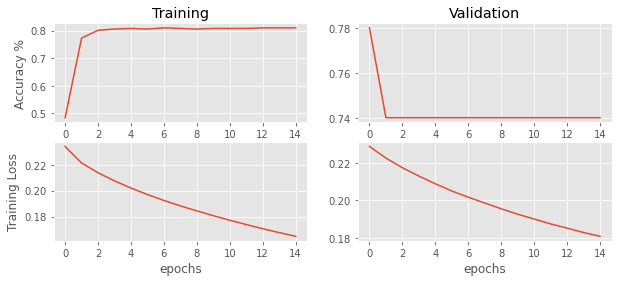

In [36]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history.history['Recall'])

plt.ylabel('Accuracy %')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history.history['val_Recall'])
plt.title('Validation')

plt.subplot(2,2,3)
plt.plot(history.history['loss'])
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')

In [37]:
# get crossed columns
#X_train_crossed = df_train[cross_col_df_names].to_numpy()
#X_test_crossed = df_test[cross_col_df_names].to_numpy()

# save categorical features
#X_train_cat = df_train[categorical_headers_ints].to_numpy() 
#X_test_cat = df_test[categorical_headers_ints].to_numpy() 

# and save off the numeric features
#X_train_num =  df_train[numeric_headers].to_numpy()
#X_test_num = df_test[numeric_headers].to_numpy()


# we need to create separate lists for each branch
crossed_outputs = []

# CROSSED DATA INPUT
input_crossed = Input(shape=(X_train_crossed.shape[1],), dtype='int64', name='wide_inputs')
for idx,col in enumerate(cross_col_df_names):
    
    # track what the maximum integer value will be for this variable
    # which is the same as the number of categories
    N = df_imputed[col].max()+1
    
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_crossed, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    crossed_outputs.append(x)
    

# now concatenate the outputs and add a fully connected layer
wide_branch = concatenate(crossed_outputs, name='wide_concat')

# reset this input branch
all_deep_branch_outputs = []

# CATEGORICAL DATA INPUT
input_cat = Input(shape=(X_train_cat.shape[1],), dtype='int64', name='categorical_input')
for idx,col in enumerate(categorical_headers_ints):
    
    # track what the maximum integer value will be for this variable
    # which is the same as the number of categories
    N = df_imputed[col].max()+1
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_cat, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    all_deep_branch_outputs.append(x)
    
# NUMERIC DATA INPUT
# create dense input branch for numeric
input_num = Input(shape=(X_train_num.shape[1],), name='numeric')
x_dense = Dense(units=22, activation='relu',name='num_1')(input_num)
    
all_deep_branch_outputs.append(x_dense)


# merge the deep branches together
deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
deep_branch = Dense(units=50,activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=25,activation='relu', name='deep2')(deep_branch)
deep_branch = Dense(units=10,activation='relu', name='deep3')(deep_branch)
deep_branch = Dense(units=5,activation='relu', name='deep4')(deep_branch)
    
# merge the deep and wide branch
final_branch = concatenate([wide_branch, deep_branch],
                           name='concat_deep_wide')
final_branch = Dense(units=1,activation='sigmoid',
                     name='combined')(final_branch)

model = Model(inputs=[input_crossed,input_cat,input_num], 
              outputs=final_branch)

In [38]:
%%time

model.compile(optimizer='adagrad',
              loss='mean_squared_error',
              metrics=['Recall'])

# lets also add the history variable to see how we are doing
# and lets add a validation set to keep track of our progress
history1 = model.fit([X_train_crossed,X_train_cat,X_train_num],
                    y_train, 
                    epochs=15, 
                    batch_size=32, 
                    verbose=1, 
                    validation_data = ([X_test_crossed,X_test_cat,X_test_num],y_test))

Train on 827 samples, validate on 91 samples
Epoch 1/15
827/827 [==============================] - 1s 2ms/sample - loss: 0.2508 - Recall: 0.6376 - val_loss: 0.2484 - val_Recall: 0.9000
Epoch 2/15
827/827 [==============================] - 0s 116us/sample - loss: 0.2455 - Recall: 0.9061 - val_loss: 0.2447 - val_Recall: 0.9000
Epoch 3/15
827/827 [==============================] - 0s 116us/sample - loss: 0.2406 - Recall: 0.9323 - val_loss: 0.2399 - val_Recall: 0.9200
Epoch 4/15
827/827 [==============================] - 0s 118us/sample - loss: 0.2354 - Recall: 0.9694 - val_loss: 0.2360 - val_Recall: 0.8800
Epoch 5/15
827/827 [==============================] - 0s 113us/sample - loss: 0.2307 - Recall: 0.9563 - val_loss: 0.2324 - val_Recall: 0.8800
Epoch 6/15
827/827 [==============================] - 0s 113us/sample - loss: 0.2264 - Recall: 0.9541 - val_loss: 0.2290 - val_Recall: 0.8800
Epoch 7/15
827/827 [==============================] - 0s 113us/sample - loss: 0.2223 - Recall: 0.9520 - v

In [39]:
yhat = np.round(model.predict([X_test_crossed,X_test_cat,X_test_num]))
print(mt.confusion_matrix(y_test,yhat))
print(mt.classification_report(y_test,yhat))

[[31 10]
 [ 7 43]]
              precision    recall  f1-score   support

           0       0.82      0.76      0.78        41
           1       0.81      0.86      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



Text(0.5, 0, 'epochs')

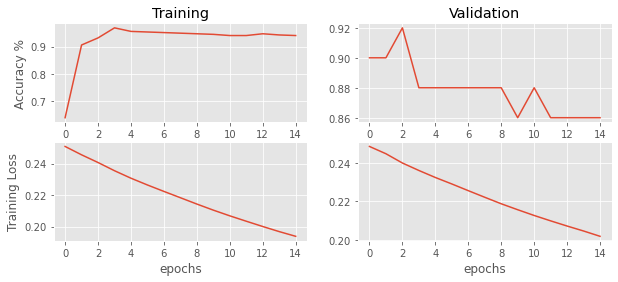

In [40]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history1.history['Recall'])

plt.ylabel('Accuracy %')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history1.history['val_Recall'])
plt.title('Validation')

plt.subplot(2,2,3)
plt.plot(history1.history['loss'])
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history1.history['val_loss'])
plt.xlabel('epochs')

When we increase the increase the layer in deep branch of network. model has accuracy of more than 86%. However, there is only minute increase in the percentage for validation set from 72 to 74%. There is slight increase in evaluation metric recall when we increase the layer in deep branch of network.

In [41]:
from sklearn import __version__ as sklearn_version

sklearn_version

'1.0.1'

Comparing without the wide branch

In [42]:
# we need to create separate lists for each branch
crossed_outputs = []

# CROSSED DATA INPUT
input_crossed = Input(shape=(X_train_crossed.shape[1],), dtype='int64', name='deep_inputs')
for idx,col in enumerate(cross_col_df_names):
    
    # track what the maximum integer value will be for this variable
    # which is the same as the number of categories
    N = df_imputed[col].max()+1
    
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_crossed, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    crossed_outputs.append(x)
    

# now concatenate the outputs and add a fully connected layer
#wide_branch = concatenate(crossed_outputs, name='wide_concat')

# reset this input branch
all_deep_branch_outputs = []

# CATEGORICAL DATA INPUT
input_cat = Input(shape=(X_train_cat.shape[1],), dtype='int64', name='categorical_input')
for idx,col in enumerate(categorical_headers_ints):
    
    # track what the maximum integer value will be for this variable
    # which is the same as the number of categories
    N = df_imputed[col].max()+1
    
    # this line of code does this: input_branch[:,idx]
    x = tf.gather(input_cat, idx, axis=1)
    
    # now use an embedding to deal with integers as if they were one hot encoded
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col+'_embed')(x)
    
    # save these outputs to concatenate later
    all_deep_branch_outputs.append(x)
    
# NUMERIC DATA INPUT
# create dense input branch for numeric
input_num = Input(shape=(X_train_num.shape[1],), name='numeric')
x_dense = Dense(units=22, activation='relu',name='num_1')(input_num)
    
all_deep_branch_outputs.append(x_dense)


# merge the deep branches together
deep_branch = concatenate(all_deep_branch_outputs,name='concat_embeds')
deep_branch = Dense(units=50,activation='relu', name='deep1')(deep_branch)
deep_branch = Dense(units=25,activation='relu', name='deep2')(deep_branch)
deep_branch = Dense(units=10,activation='relu', name='deep3')(deep_branch)
    
# merge the deep and wide branch
final_branch = Dense(units=1,activation='sigmoid',
                     name='combined')(deep_branch)

model = Model(inputs=[input_crossed,input_cat,input_num], 
              outputs=final_branch)






In [43]:
%%time

model.compile(optimizer='adagrad',
              loss='mean_squared_error',
              metrics=['Recall'])

# lets also add the history variable to see how we are doing
# and lets add a validation set to keep track of our progress
history2 = model.fit([X_train_crossed,X_train_cat,X_train_num],
                    y_train, 
                    epochs=15, 
                    batch_size=32, 
                    verbose=1, 
                    validation_data = ([X_test_crossed,X_test_cat,X_test_num],y_test))

Train on 827 samples, validate on 91 samples
Epoch 1/15
827/827 [==============================] - 1s 1ms/sample - loss: 0.2416 - Recall: 0.7445 - val_loss: 0.2344 - val_Recall: 0.6800
Epoch 2/15
827/827 [==============================] - 0s 98us/sample - loss: 0.2291 - Recall: 0.7686 - val_loss: 0.2277 - val_Recall: 0.6800
Epoch 3/15
827/827 [==============================] - 0s 104us/sample - loss: 0.2214 - Recall: 0.7686 - val_loss: 0.2229 - val_Recall: 0.6800
Epoch 4/15
827/827 [==============================] - 0s 105us/sample - loss: 0.2153 - Recall: 0.7664 - val_loss: 0.2191 - val_Recall: 0.6800
Epoch 5/15
827/827 [==============================] - 0s 99us/sample - loss: 0.2101 - Recall: 0.7598 - val_loss: 0.2158 - val_Recall: 0.6800
Epoch 6/15
827/827 [==============================] - 0s 98us/sample - loss: 0.2055 - Recall: 0.7598 - val_loss: 0.2127 - val_Recall: 0.6800
Epoch 7/15
827/827 [==============================] - 0s 97us/sample - loss: 0.2013 - Recall: 0.7598 - val_l

In [44]:
yhat = np.round(model.predict([X_test_crossed,X_test_cat,X_test_num]))
print(mt.confusion_matrix(y_test,yhat))
print(mt.classification_report(y_test,yhat))

[[38  3]
 [15 35]]
              precision    recall  f1-score   support

           0       0.72      0.93      0.81        41
           1       0.92      0.70      0.80        50

    accuracy                           0.80        91
   macro avg       0.82      0.81      0.80        91
weighted avg       0.83      0.80      0.80        91



Text(0.5, 0, 'epochs')

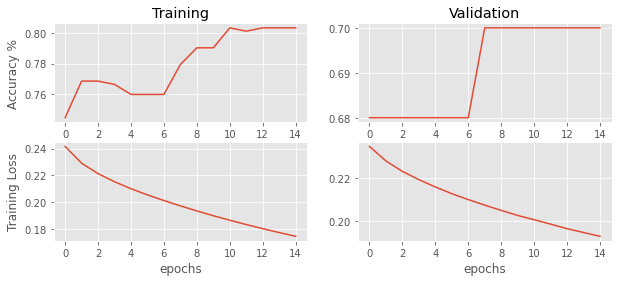

In [45]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.figure(figsize=(10,4))
plt.subplot(2,2,1)
plt.plot(history2.history['Recall'])

plt.ylabel('Accuracy %')
plt.title('Training')
plt.subplot(2,2,2)
plt.plot(history2.history['val_Recall'])
plt.title('Validation')

plt.subplot(2,2,3)
plt.plot(history2.history['loss'])
plt.ylabel('Training Loss')
plt.xlabel('epochs')

plt.subplot(2,2,4)
plt.plot(history2.history['val_loss'])
plt.xlabel('epochs')

model without wide network does not perform well on validation set

In [46]:
for layer in model.layers:
    weights = layer.get_weights() # list of numpy arrays
print(weights)

[array([[-0.73557705],
       [ 0.19482702],
       [-0.20064841],
       [ 0.61003894],
       [ 0.02547364],
       [-0.15323083],
       [ 0.28561175],
       [-0.36860996],
       [-0.4295541 ],
       [ 0.31671563]], dtype=float32), array([0.027422], dtype=float32)]


In [47]:
from sklearn.decomposition import PCA

In [48]:
pca = PCA(n_components=2)
pca.fit(X) # fit data and then transform it
X_pca = pca.transform(X)

In [49]:
import seaborn as sns

Text(0, 0.5, '0.07*Se -0.17*ChestPainTyp +0.15*RestingEC -0.02*ExerciseAngin +0.02*ST_Slop -0.06* -0.43*Rest -0.69*Choles -0.33* +0.07*Fast -0.40*Ol ')

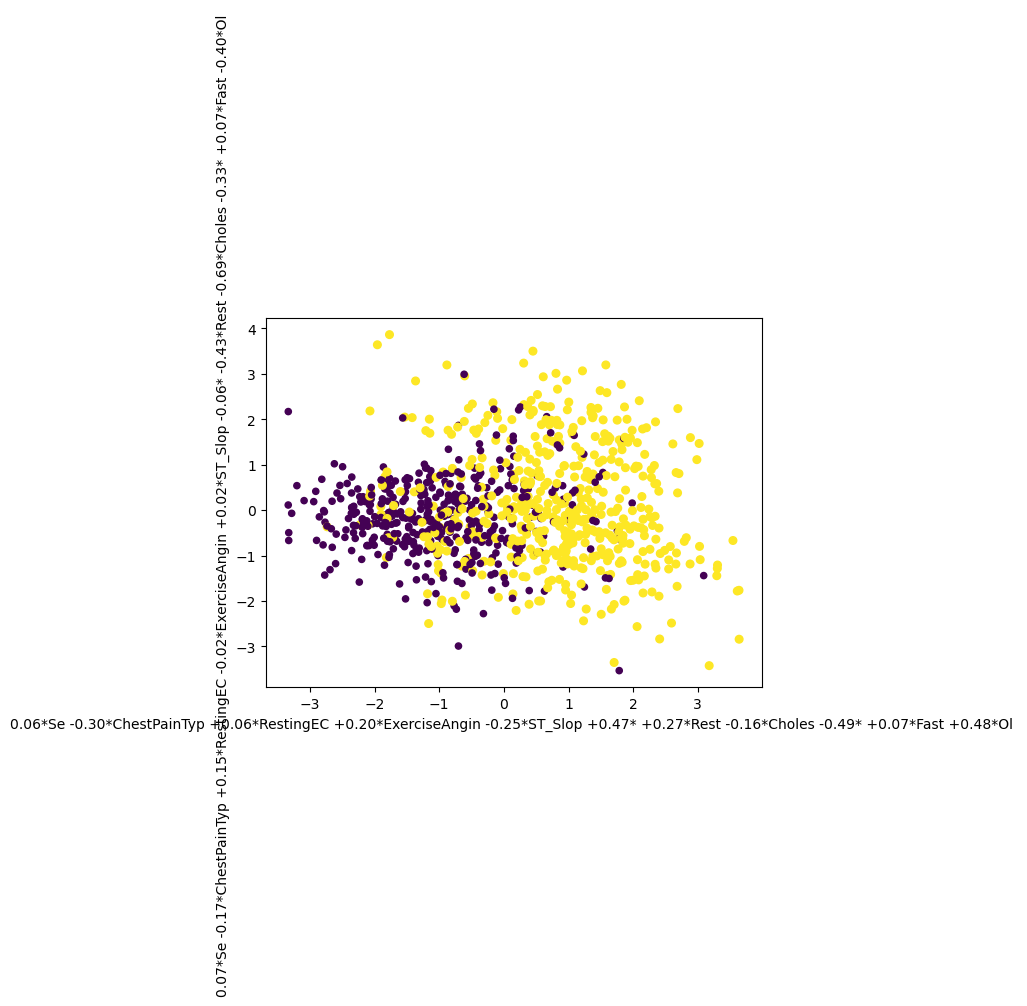

In [50]:
import seaborn as sns
cmap = sns.set(style="darkgrid") 

# this function definition just formats the weights into readable strings
# you can skip it without loss of generality to the Data Science content
def get_feature_names_from_weights(weights, names):
    tmp_array = []
    for comp in weights:
        tmp_string = ''
        for fidx,f in enumerate(names):
            if fidx>0 and comp[fidx]>=0:
                tmp_string+='+'
            tmp_string += '%.2f*%s ' % (comp[fidx],f[:-5])
        tmp_array.append(tmp_string)
    return tmp_array
  
plt.style.use('default')
# now let's get to the Data Analytics!
pca_weight_strings = get_feature_names_from_weights(pca.components_, feature_columns) 

# create some pandas dataframes from the transformed outputs
df_pca = pd.DataFrame(X_pca,columns=[pca_weight_strings])

from matplotlib.pyplot import scatter

# scatter plot the output, with the names created from the weights
ax = scatter(X_pca[:,0], X_pca[:,1], c=y, s=(y+2)*10, cmap=cmap)
plt.xlabel(pca_weight_strings[0]) 
plt.ylabel(pca_weight_strings[1])